## Palindrome

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns',None)

### 1.

In [7]:
df = pd.read_excel('pone_0212445_s004.xlsx',header=1)
df.shape

(104, 9)

In [8]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


### 2.

##### a.

In [10]:
df_a = df[df["Estimate"]=="Survey"].copy()
print(df_a["NoPLHIV"].sum())

6409903


##### b.

In [16]:
df_b=df[df["District"]=="Xhariep"].copy()
np.round(df_b["NoPLHIV"].mean(),2)

12247.5

##### c. 

In [22]:
df_c = df.copy()
df_c["notHIV"] = df_c.apply(lambda x: ((100*x["NoPLHIV"])/x["Prevalence_%"])*(1-(x["Prevalence_%"]/100)), axis=1)
df_c.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,notHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,6.507762e+05
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,6.515169e+05
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3.659845e+06
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3.628178e+06
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,4.072906e+05


##### d.

In [26]:
df_d = df[df["District"].str.contains("City|Metro",case=False)].copy()
df_d["NoPLHIV"].sum()

2572733

### 3.

In [41]:
df_3 = df.copy()
new_cols = [re.search(r'\w+',x).group().replace("_"," ") for x in df.columns]
new_cols = [x.strip() for x in new_cols]
df_3.columns = new_cols
df_3.columns

Index(['District', 'Code', 'Estimate', 'Prevalence', 'Prevalence LCL',
       'Prevalence UCL', 'NoPLHIV', 'NoPLHIV LCL', 'NoPLHIV UCL'],
      dtype='object')

### 4.

In [43]:
df_4 = df[df["Estimate"]=="Fay-Heriott"].copy()
df_4 = df_4[df_4["District"].str.endswith('i')]

In [45]:
df_4.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321


In [49]:
df_4.shape

(9, 9)

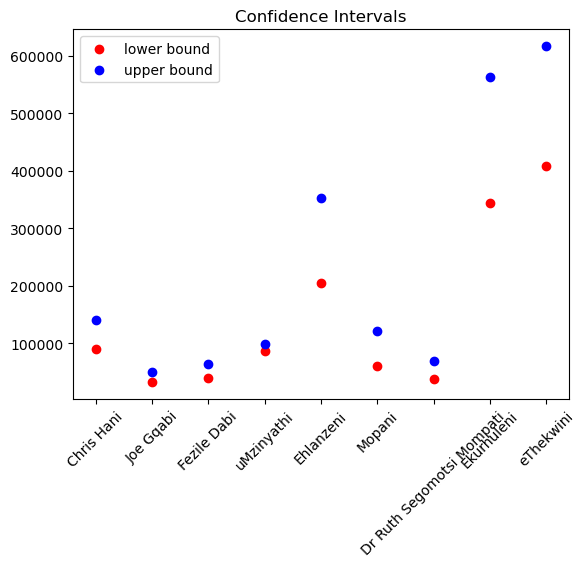

In [54]:
x_positions = [1,2,3,4,5,6,7,8,9]
chart_labels = df_4["District"]
lower = df_4["NoPLHIV_LCL"]
upper = df_4["NoPLHIV_UCL"]

ax = plt.subplot()
plt.scatter(x_positions,lower,color = 'red')
plt.scatter(x_positions,upper,color = 'blue')
plt.legend(['lower bound', 'upper bound'], loc='best')
plt.xticks(x_positions,chart_labels, rotation=45)
plt.title('Confidence Intervals')

plt.show()